In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading File
dataset = pd.read_csv('./Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# Taking independant variables
X = dataset.iloc[:,:-1].values
# X = dataset.iloc[:,:-1]
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [4]:
# Taking dependant Variables
Y = dataset.iloc[:,-1].values
Y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [5]:
# Splitting the train-test data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 1/3, random_state = 42)

/home/rishi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
# Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# Predicting values
pred = regressor.predict(X_test)
print(pred)
print()
print(y_test)

[115814.30756236  71511.92534771 102617.85328566  75282.34085534
  55487.65944028  60200.67882482 122412.53470072 107330.8726702
  63028.49045554  35692.97802523]

[112635.  67938. 113812.  83088.  64445.  57189. 122391. 109431.  56957.
  39343.]


In [18]:
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() 
# and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). 
# The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)
regressor.score(X_train,y_train)

0.9549236946181227

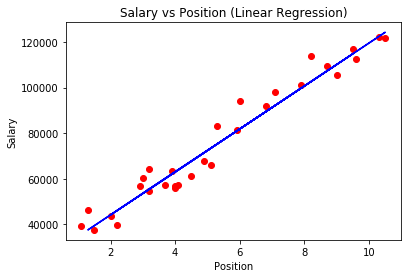

In [19]:
plt.scatter(X,Y,color='red')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Salary vs Position (Linear Regression)')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.show()